In [1]:
%matplotlib inline
import sys
import os
import opendssdirect as dss
from opendssdirect.utils import Iterator
import opendssdirect.utils 
module_path = os.path.abspath(os.path.join('.','src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from DCymetoDSS import CymeToDSS
import ODSS as DSS

## Load OpenDSS Data Model

In [3]:
system = DSS.loadDSS()
#system = DSS.DSSrunsnap(system, show = False)

## Assign a time Series, Monitors, PV System and BSS to the system. 

In [4]:
system = DSS.addLoadTimeSeries(system, run_type='Yearly', filename = 'load_shape_yearly.csv')
system = DSS.addMonitors(system)
system = DSS.addPVSystem(system, bus='240_head', inverter=1680, capacity=1303, irradiance = 1.0, run_type='Yearly', timeseries = 'pv_shape_yearly.csv')
system = DSS.addBSSystem(system, bus='240_head', power=500, energy=3360, run_type='Yearly', timeseries = 'BSS_shape_yearly.csv')

## Run the yearly simulation. 

In [5]:
system = DSS.DSSrunts(system, run_type='Yearly')

## Results Analysis Section
### Analysis of the voltages at the loads. 

<Figure size 648x2160 with 0 Axes>

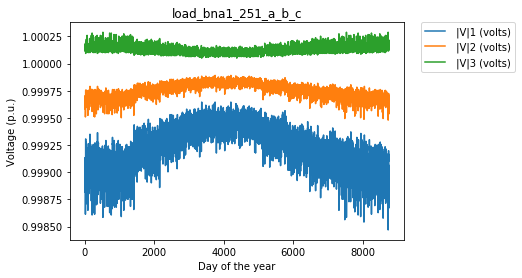

<Figure size 648x2160 with 0 Axes>

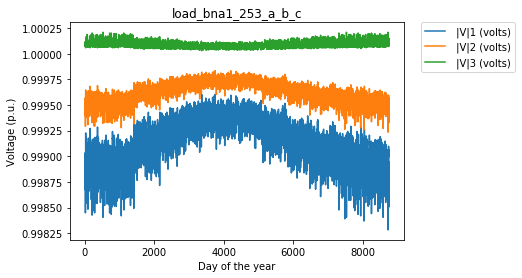

<Figure size 648x2160 with 0 Axes>

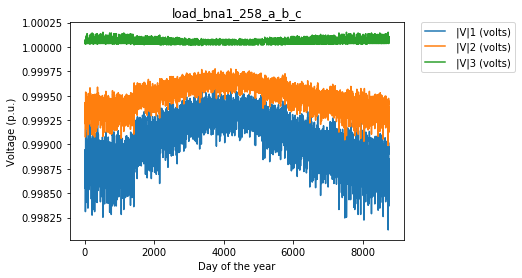

<Figure size 648x2160 with 0 Axes>

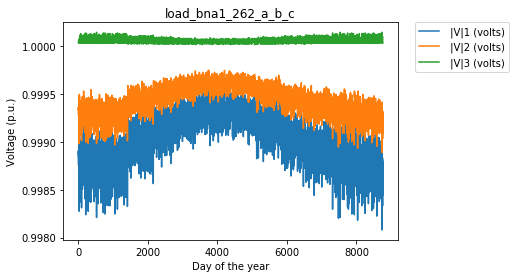

<Figure size 648x2160 with 0 Axes>

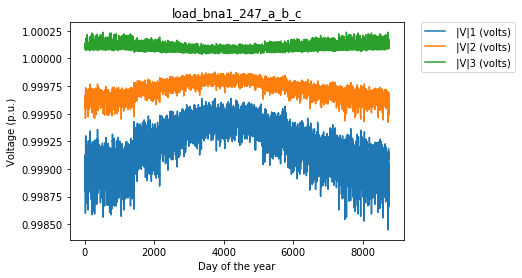

<Figure size 648x2160 with 0 Axes>

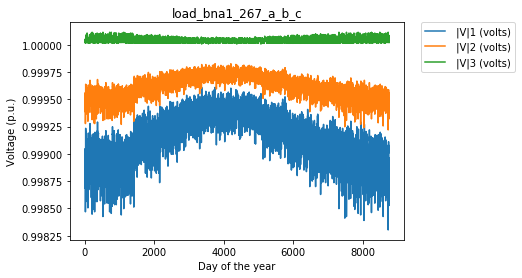

<Figure size 648x2160 with 0 Axes>

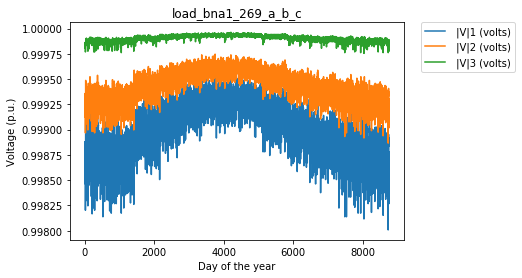

<Figure size 648x2160 with 0 Axes>

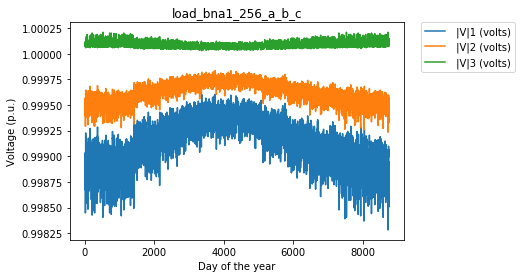

In [24]:
regex = re.compile('.*a_b_c$')
for l in dss.Loads.AllNames():
    if re.match(regex,l):
        string_dss = "{0}_{1}".format(l,"voltage")
        mon_df = DSS.monitor2df(system, monitor_name=string_dss)
        mon_df= mon_df/(system.Vsources.BasekV()*1000/1.7320508076)
        plt.figure()
        mon_df[[' |V|1 (volts)', ' |V|2 (volts)', ' |V|3 (volts)']].plot()
        plt.ticklabel_format(useOffset=False)
        plt.title(l)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.axes().fig_size
        plt.xlabel('Day of the year')
        plt.ylabel('Voltage (p.u.)')
        plt.savefig(os.path.join(module_path,"../{0}.png".format(string_dss)), bbox_extra_artists=(lgd,), bbox_inches='tight')

## Power Output from the Diesel Gen Set. 
OpenDSS add a Voltage Sources by default, in this case it represents the diesel generator

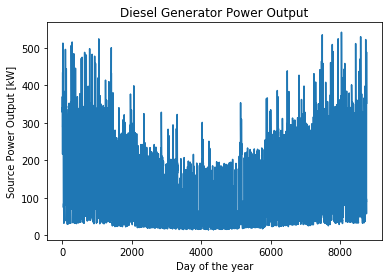

In [7]:
source_df = DSS.monitor2df(system, monitor_name='source_power') 
plt.figure()
plt.plot(-1*source_df[[' P1 (kW)', ' P2 (kW)', ' P3 (kW)']].sum(1))
plt.xlabel('Day of the year')
plt.ylabel('Source Power Output [kW]')
plt.title('Diesel Generator Power Output')
plt.savefig(os.path.join(module_path,"../{0}.png".format("source")), bbox_extra_artists=(lgd,), bbox_inches='tight')

## PV Power Output 

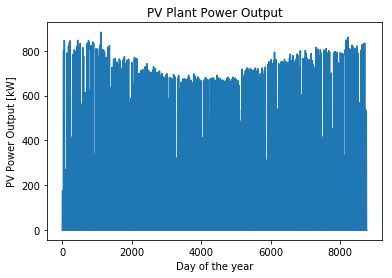

In [8]:
PV_df = DSS.monitor2df(system, monitor_name='pvsystem_power') 
plt.figure()
plt.plot(-1*PV_df[[' P1 (kW)', ' P2 (kW)', ' P3 (kW)']].sum(1))
plt.xlabel('Day of the year')
plt.ylabel('PV Power Output [kW]')
plt.title('PV Plant Power Output')
plt.savefig(os.path.join(module_path,"../{0}.png".format("pv")), bbox_extra_artists=(lgd,), bbox_inches='tight')

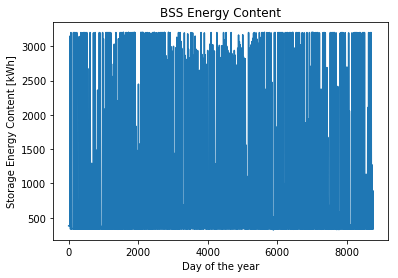

In [9]:
bss_df = DSS.monitor2df(system, monitor_name='bss_internal') 
plt.figure()
plt.plot(bss_df[[' kWh']].sum(1))
plt.xlabel('Day of the year')
plt.ylabel('Storage Energy Content [kWh]')
plt.title('BSS Energy Content')
plt.savefig(os.path.join(module_path,"../{0}.png".format("bss_energy")), bbox_extra_artists=(lgd,), bbox_inches='tight')